In [1]:
#importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the training data
rd = pd.read_csv("HousePrices.csv")
rd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Performing EDA

In [4]:
rd_copy=rd.copy()

In [5]:
rd.shape

(1460, 81)

In [6]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
rd.set_index('Id', inplace = True)
rd.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


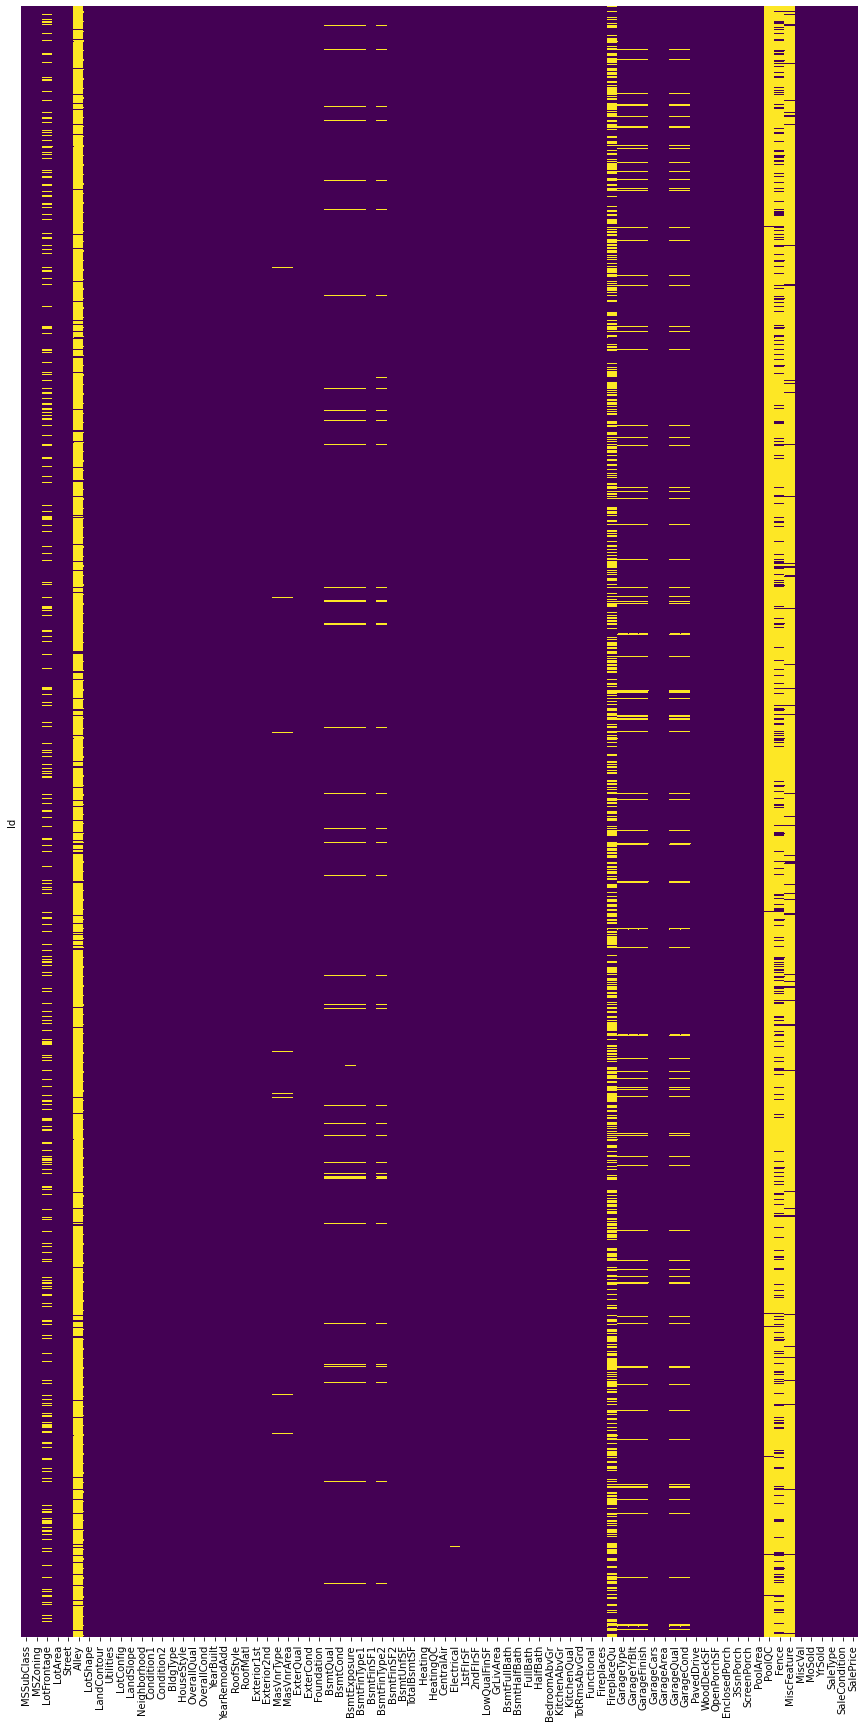

In [8]:
plt.figure(figsize = (15,30))
sns.heatmap(rd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
rd.drop('Alley', axis=1, inplace = True)
rd.drop('PoolQC', axis=1, inplace = True)
rd.drop('MiscFeature', axis=1, inplace = True)
rd.drop('Fence', axis=1, inplace = True)
rd.drop('FireplaceQu' , axis=1, inplace = True)
rd.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
rd=rd.dropna()

In [11]:
rd.shape

(1094, 75)

In [ ]:
#Converting Categorical Data into Numerical Data

In [12]:
label_List_1 =[]
for col in rd:
    if rd[col].dtype == 'object':
        label_List_1.append(col)
    else:
        pass

print(label_List_1)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for label in label_List_1:
    rd[label] = le.fit_transform(rd[label].astype(str))
rd.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [15]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   int32  
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   int32  
 5   LotShape       1094 non-null   int32  
 6   LandContour    1094 non-null   int32  
 7   Utilities      1094 non-null   int32  
 8   LotConfig      1094 non-null   int32  
 9   LandSlope      1094 non-null   int32  
 10  Neighborhood   1094 non-null   int32  
 11  Condition1     1094 non-null   int32  
 12  Condition2     1094 non-null   int32  
 13  BldgType       1094 non-null   int32  
 14  HouseStyle     1094 non-null   int32  
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

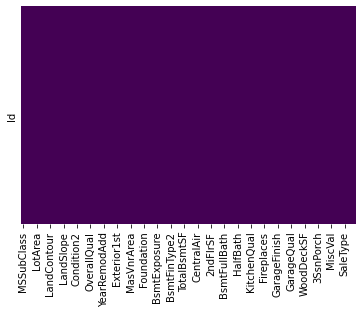

In [16]:
sns.heatmap(rd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
rd.shape

(1094, 75)

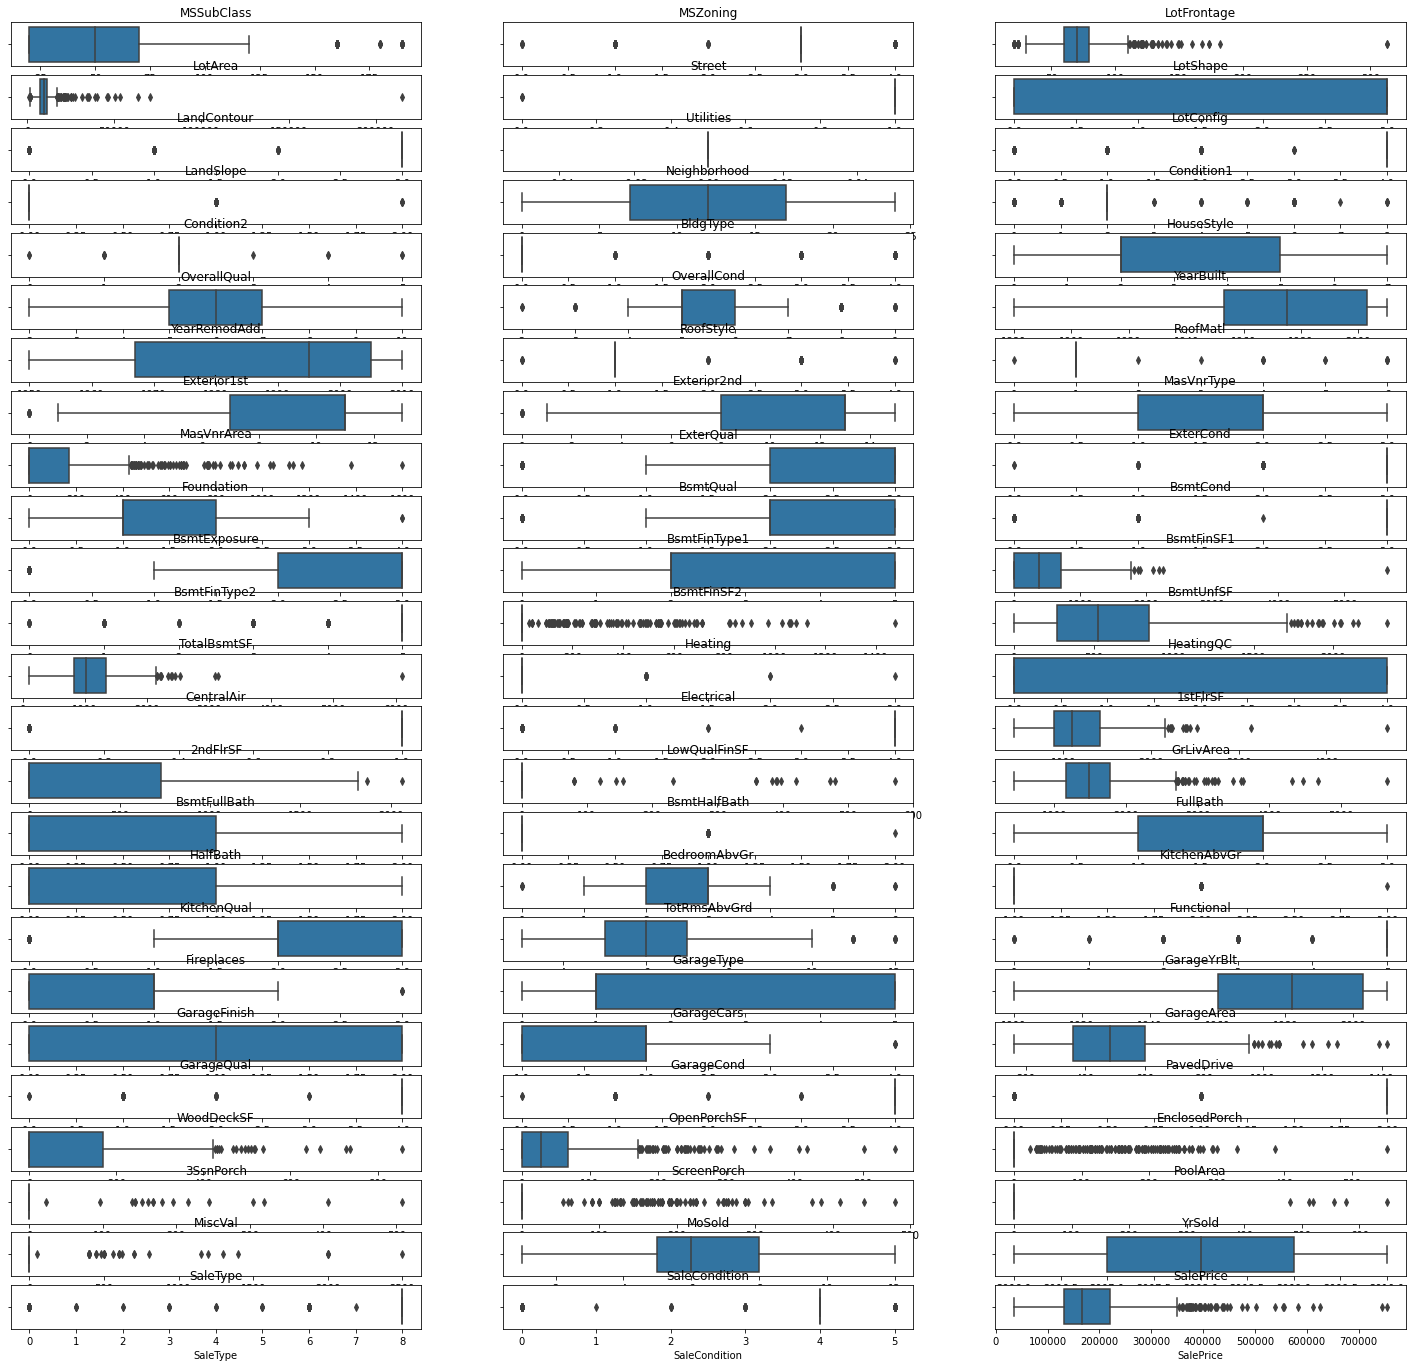

In [18]:
#Using BoxPlots to check For Any Outliers
plt.figure(figsize = (25,25))
count=1
for col in rd:
    plt.subplot(26,3,count)
    sns.boxplot(rd[col]) 
    plt.title(col)
    count+=1
       
plt.show()

In [19]:
rd.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [20]:
#Dividing the training data into X and Y
X = rd.iloc[:,:-1].values
y = rd.iloc[:,-1].values

In [21]:
X.shape

(1094, 74)

In [22]:
y.shape

(1094,)

In [23]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [24]:
#Splitting the data into Train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [25]:
# Building Model
from sklearn.linear_model import LinearRegression

In [26]:
regressor = LinearRegression()

In [27]:
regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
#Y-prediction
y_pred = regressor.predict(X_test)
y_pred

array([198432.54695122, 156486.54695122, 163340.54695122, 306844.54695122,
       213604.54695122, 297204.54695122, 195284.54695122, 305996.54695122,
       134828.54695122, 164048.54695122, 115726.54695122, 463812.54695122,
       266280.54695122, 127692.54695122, 152817.54695122, 261332.54695122,
       111564.54695122, 142376.54695122, 180370.04695122, 102064.54695122,
       127484.54695122, 205740.54695122, 212736.54695122, 130588.54695122,
       193408.54695122, 241926.54695122, 155125.54695122, 115464.54695122,
       131961.54695122, 153367.54695122, 173532.54695122, 207481.04695122,
       147104.54695122, 239036.54695122, 117136.54695122, 329100.54695122,
       117428.54695122, 130820.54695122, 213052.54695122, 166403.54695122,
       213272.54695122, 180045.54695122, 150692.54695122,  56080.54695122,
       124448.54695122, 219952.54695122, 129096.54695122, 181623.17195122,
       114460.54695122, 254664.54695122, 149020.54695122, 225772.54695122,
       301244.54695122, 3

In [29]:
#Checking the score and accuracy 
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test,y_pred)

0.768270691797778